# R to python



with the rpy2 we can run R code into an txt file or just plain text, then setting into a <i> robjects.r() </i> function

In [1]:
from rpy2 import robjects

with open('./testfunc.txt', 'r') as file:
    function = file.read()
    #print(function+"simon")
    r_func=robjects.r(function)
    print(r_func)




[1] 18.84956



In [2]:
robjects.r('''# create a function `f`
         f <- function(val, verbose=FALSE) {
             if (verbose) {
                 cat("I am calling f().\n")
             }
             2 * pi * val
         }
         # call the function `f` with argument value 3
         f(3)''')



18.849556


i made some progress loadind the BSIWMS funct, but i still dont know how to use the R function into python enviroment 

In [3]:
bswimstext = ""
with open('./BSWIMS.txt', 'r') as file:
    #this file contains the BSWIMS function 
    bswimstext = file.read()

robjects.r(bswimstext)

#robjects.r(''' BSWiMS.model(formula = paste(theOutcome," ~ 1"),data = theData,NumberofRepeats = bswimsReps) ''')

R object with classes: ('function',) mapped to:
<SignatureTranslatedFunction - Python:0x00000239E28D0148 / R:0x00000239E2B71320>

# LINEAR MODEL IN R
los chunks a continuacion son una implementacion de Rpy2 para correr un <i>lm()</i>  en R y desplegar los resultados y plots en python

In [5]:
#imports de librarias y lectura del csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df_diab = pd.read_csv("diabetes.csv")
df_diab.head()

,subject,age,acidity,y
0,1,5.2,-8.1,4.8
1,2,8.8,-16.1,4.1
2,3,10.5,-0.9,5.2
3,4,10.6,-7.8,5.5
4,5,10.4,-29.0,5.0


In [6]:
#cargar las funciones lm y predict
r_lm = robjects.r["lm"]
r_predict = robjects.r["predict"]
#r_plot = robjects.r["plot"] # more on plotting later

#lm() and predict() are two of the most common functions we'll use

In [8]:
#Populating vectors and dataframe so R understands
r_y = robjects.FloatVector(df_diab['y'])
r_age = robjects.FloatVector(df_diab['age'])
# What happens if we pass the wrong type?
# How does r_age display?
# How does r_age print?

diab_r = robjects.DataFrame({"y":r_y, "age":r_age})
# How does diab_r display?
# How does diab_r print?
diab_r

y,age
4.800000,5.200000
4.100000,8.800000
5.200000,10.500000
5.500000,10.600000
...,...
4.100000,12.500000
4.600000,13.200000
4.900000,8.900000
5.100000,10.800000


In [12]:
#Populating formulas R understands
simple_formula = robjects.Formula("y~.") 
diab_lm = r_lm(formula=simple_formula, data=diab_r) #can also use a 'dumb' formula and pass a dataframe

In [13]:
# Running Models in R
diab_lm

R object with classes: ('lm',) mapped to:
<ListVector - Python:0x00000239EA063688 / R:0x00000239E48CED80>
[FloatVector, FloatVector, FloatVector, IntVector, ..., ListVector, Vector, Formula, DataFrame]
  coefficients: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x00000239E9087A48 / R:0x00000239E4DB8978>
[3.996031, 0.083086]
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x00000239EA06A988 / R:0x00000239E414D880>
[0.371921, -0.627189, 0.331564, 0.623256, ..., -0.934608, -0.492768, 0.164502, 0.206638]
  effects: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x00000239EA06A048 / R:0x00000239E445AC80>
[-31.124958, -2.165975, 0.333051, 0.627310, ..., -0.881769, -0.421956, 0.124907, 0.215828]
  rank: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x00000239EA06A808 / R:0x00000239E3D76018>
[2]
...
R object with classes: ('lm',) mapped to:
<ListVector - Python:0x00000239EA063688 / R:0x00000239E48CED80>
[FloatVector, FloatVector, FloatVector, IntVector, ..., ListVector, Vector, Formula, DataFrame]
  qr: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('lm',) mapped to:
<Vector - Python:0x00000239EA05FE88 / R:0x00000239E36F11E0>
[SignatureTrans..., Formula, DataFrame]
  df.residual: <class 'rpy2.robjects.Formula'>
  R object with classes: ('terms', 'formula') mapped to:
<Formula - Python:0x00000239EA05F6C8 / R:0x00000239E36A94C8>
R object with classes: ('lm',) mapped to:
<ListVector - Python:0x00000239EA063688 / R:0x00000239E48CED80>
[FloatVector, FloatVector, FloatVector, IntVector, ..., ListVector, Vector, Formula, DataFrame]

In [14]:
print(diab_lm.names) # view all names

 [1] "coefficients"  "residuals"     "effects"       "rank"         

 [5] "fitted.values" "assign"        "qr"            "df.residual"  

 [9] "xlevels"       "call"          "terms"         "model"        



In [15]:
#both are the same
diab_lm[0] #grab the first elemen
diab_lm.rx2("coefficients") #use rx2 to get elements by name!


3.996031,0.083086


In [16]:
np.array(diab_lm.rx2("coefficients")) #r vectors can be converted to numpy (but rarely needed)

array([3.99603115, 0.08308615])

In [17]:
#Getting Predictions
# make a df to predict on (might just be the validation or test dataframe)
predict_df = robjects.DataFrame({"age": robjects.FloatVector(np.linspace(0,16,100))})

# call R's predict() function, passing the model and the data 
predictions = r_predict(diab_lm, predict_df)


In [18]:
x_vals = predict_df.rx2("age")

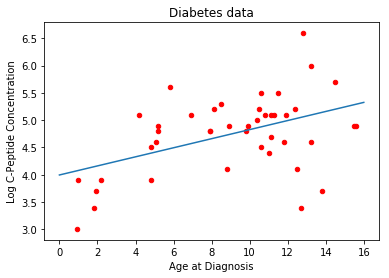

In [20]:

ax = df_diab.plot.scatter(x='age',y='y',c='Red',title="Diabetes data")
ax.set_xlabel("Age at Diagnosis")
ax.set_ylabel("Log C-Peptide Concentration");

ax.plot(x_vals,predictions); #plt still works with r vectors as input!